In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [47]:
df=pd.read_csv("StudentPerformance.csv")

In [48]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [52]:
df.head()



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [53]:
df.shape

(10000, 6)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [55]:
df.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(127)

In [57]:
df = df.drop_duplicates()


In [58]:
df.duplicated().sum()


np.int64(0)

MAE: 15.543749301526752
R2 : 0.12353189607610249


### EDA

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

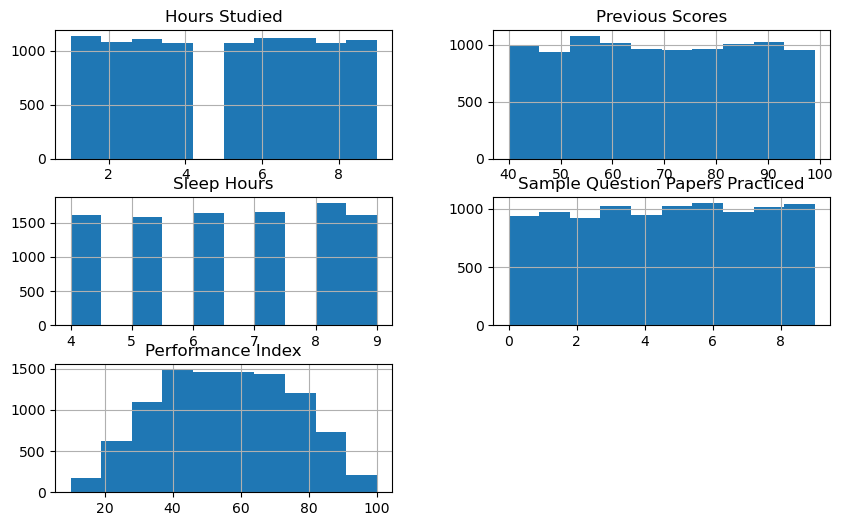

In [61]:
df.hist(figsize=(10,6))



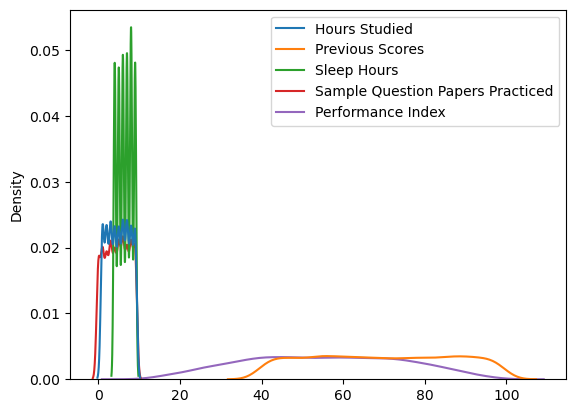

In [62]:
import seaborn as sns

sns.kdeplot(df)
plt.show()

<Axes: >

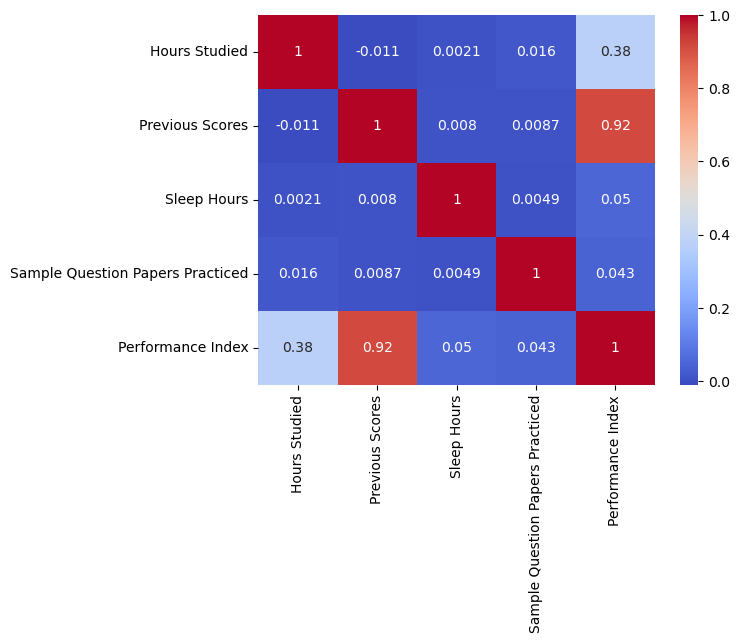

In [75]:

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

# Model 1

In [111]:

X = df[['Hours Studied', 'Sample Question Papers Practiced','Previous Scores']]
y = df['Performance Index']

print(X.shape)
print(y.shape)


(9873, 3)
(9873,)


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred1 = lr.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R2 :", r2_score(y_test, y_pred1))


MAE: 1.8053227662719482
MSE: 5.18443433786214
RMSE: 2.276935295053889
R2 : 0.9860695174212047


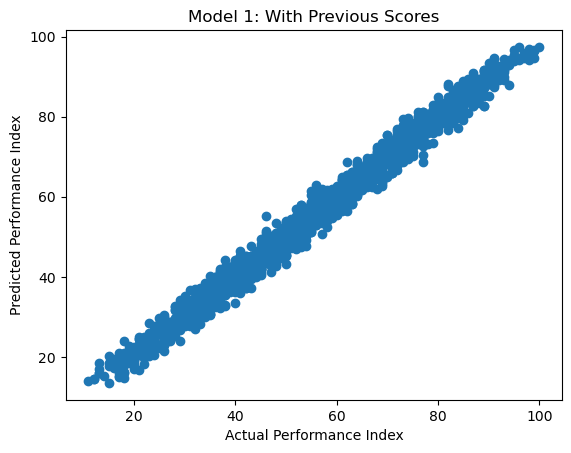

In [114]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Model 1: With Previous Scores")
plt.show()


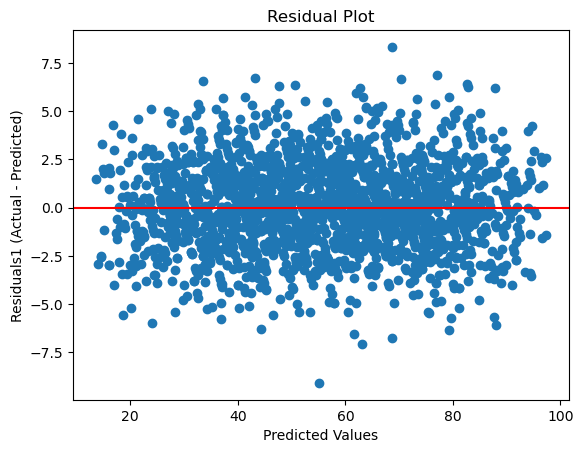

In [136]:
residuals1 = y_test - y_pred

import matplotlib.pyplot as plt
plt.scatter(y_pred1, residuals1)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals1 (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


# Model 2

In [124]:

X1 = df[['Hours Studied', 'Sample Question Papers Practiced']]
y1 = df['Performance Index']

print(X1.shape)
print(y1.shape)


(9873, 2)
(9873,)


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split
X1_train, X1_test, y1_train, y_test1 = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# scaling
scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [137]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf.fit(X1_train, y1_train)


print("MAE:", mean_absolute_error(y_test1, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred2)))
print("R2 :", r2_score(y_test1, y_pred2))


MAE: 15.456180230685028
MSE: 320.26887574984397
RMSE: 17.896057547679153
R2 : 0.13944324425501387


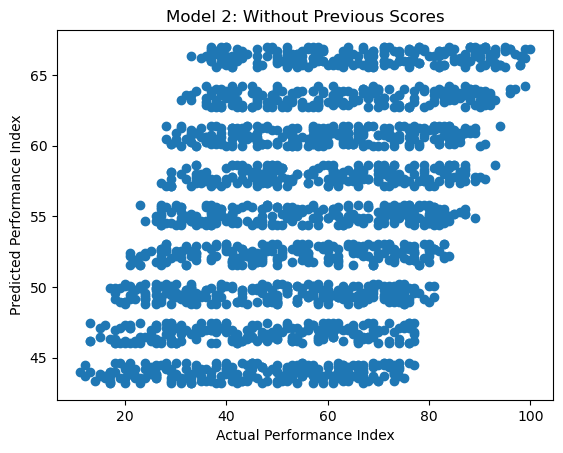

In [138]:
import matplotlib.pyplot as plt

plt.scatter(y_test1, y_pred2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Model 2: Without Previous Scores")
plt.show()


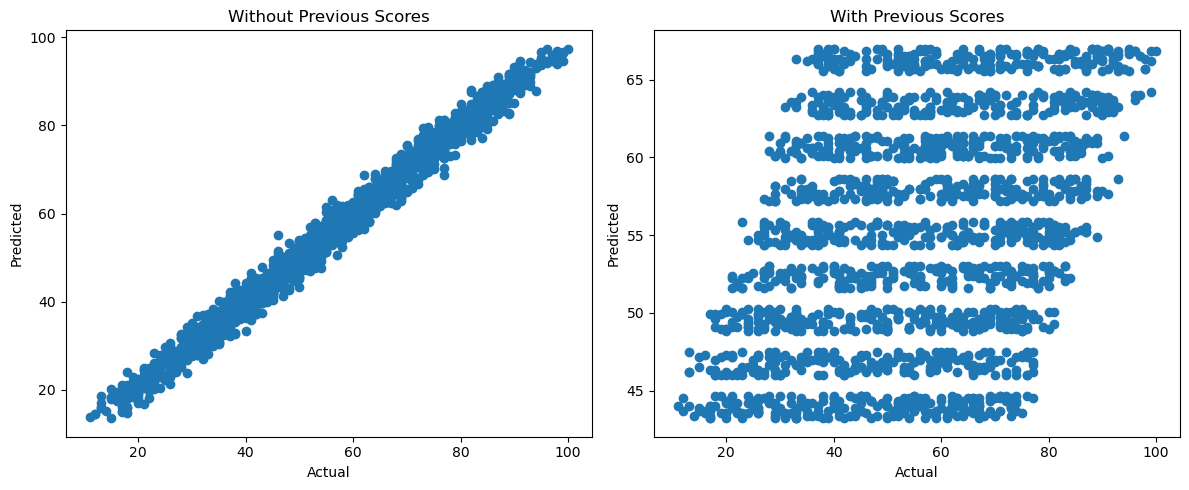

In [139]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred1)
plt.title("Without Previous Scores")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred2)
plt.title("With Previous Scores")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


The scatter plots clearly show that including previous scores results in near-perfect predictions, whereas excluding them leads to high dispersion, highlighting the difficulty of early-stage performance prediction.

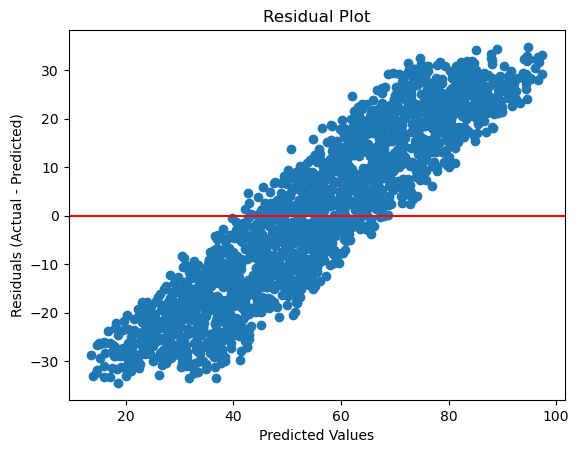

In [135]:
residuals2 = y_test1 - y_pred2

import matplotlib.pyplot as plt
plt.scatter(y_pred1, residuals2)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals2 (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
